# Introduction to the ice fitting workshop - 10/jun/2022

### About ENIIGMA

This Jupyter notebook contains a tutorial of the ENIIGMA fitting tool (Rocha et al. 2021).
Specifically, it shows: 

(I) the steps for continuum determination of the infrared spectrum of protostars;

(II) how to perform the spectral fitting of ice bands using laboratory spectrum;

(III) introduce the statistical analysis after the fit, which covers confidence interval analysis, column density determination and degenacy assessment of the fits.

### Documentation

The ENIIGMA fitting tool has two sources of documentation:

1) Rocha et al. (2021): https://www.aanda.org/articles/aa/abs/2021/10/aa39360-20/aa39360-20.html

2) Readthedocs: https://eniigma-fitting-tool.readthedocs.io/en/latest/


### Installation

You can find the installation steps and the required packages to run ENIIGMA at the "readthedocs" documentation.

### Import modules

As a standard python code, here, you import the modules needed to run the ENIIGMA functions.

In [1]:
import pyevolve
%matplotlib inline
import matplotlib.pyplot as plt
from ENIIGMA.Continuum import Fit
from ENIIGMA.GA import optimize
from ENIIGMA.GA import check_ga
from ENIIGMA.Stats import Pie_chart_plots
from ENIIGMA.Stats import Stats_Module
from ENIIGMA.Stats import Degen_plots
import ENIIGMA

### Genetic algorithm optimization

Once the optical depth is obtained, ENIIGMA performs the spectral fitting using the laboratory data. The function used here is **optimize.ENIIGMA**. The input information are:

1) **filename:** the path to the file containing the optical depth spectrumm;

2) the range to perform the fit;

3) **list_sp:** a list with the initial guess of species to start the fitting;

4) **group_comb:** sets how to group potential solutions to fit the observation data. This informaiton is used in the very last stage of the code.

5) **skip:** when *True* the code performs the fit using only the species included in the *list_sp*. When *False*, ENIIGMA searches for the best combination within the entire ensamble of laboratory data.

6) **pathlib:** when *None* the code uses the standard library of experimental data. Otherwise, users can indicate the path to their own library of data.

7) **ga_max:** sets a limit for the coefficients of the linear combination during the optmization process.


An example is given below:

In [ ]:
filename = 'OD_EL29_silicate_subtracted.dat'
#list_sp = ['H2O_40K', 'H2O_NH3_CO2_CH4_10_1_1_1_72K_b', 'd_NH3_CH3OH_50_10K_I10m_Baselined', 'CO_NH3_10K', 'H2O_CH4_10_0.6_a_V3', 'CO_CH3OH_10K', 'HNCO_NH3']
list_sp = ['H2Oa', 'CO2', 'CO', 'Fig6_OR1t', 'CO_CH3OH_10K', 'H2O_NH3_CO2_CH4_10_1_1_1_35K_b', 'H2O_CH3CH2OH_15.0K', 'H2O_NH3_1_0.5_c'] #guess list
optimize.ENIIGMA(filename, 5, 20., list_sp, group_comb=3, skip=False, pathlib = None, ga_max = 0.5)

 
 
|			ENIIGMA CODE				|
| A Python module for the decomposition of IR ice spectra using |
|        laboratory data and genetic modeling algorithm         |
|                   Current Version: V.0                        |
|                         April 2020                            |
DIR: /Users/willrocha/Test_ENIIGMA_Hawaii_jpy/ENIIGMA-fitting-tool/
Performing a linear combination of pure ices...
round 1.0 of 10 Score = 0.052881
round 2.0 of 10 Score = 0.052919
round 3.0 of 10 Score = 0.052931
round 4.0 of 10 Score = 0.056726
round 5.0 of 10 Score = 0.054044
round 6.0 of 10 Score = 0.056997
round 7.0 of 10 Score = 0.049927
round 8.0 of 10 Score = 0.054335
round 1.0 of 3 Score = 0.049731
round 2.0 of 3 Score = 0.048908
round 3.0 of 3 Score = 0.048127
round 1 of 84 Score = 0.063854
round 2 of 84 Score = 0.061133
round 3 of 84 Score = 0.088844
round 4 of 84 Score = 0.088558
round 5 of 84 Score = 0.065655
round 6 of 84 Score = 0.055028
round 7 of 84 Score = 0.057292
round 8 of 84 Sco

### Statistical analisys

This is the third and last module of the ENIIGMA fitting tool. We show here how to use ENIIGMA's functionalities to evaluate the goodness of the fit.

#### Check top five best solutions

As ENIIGMA runs, several combinations among the experimental data are performed. The function **check_ga.top_five_scaled** produces a graph where the fitness function changes at each generation (or iteration). This function is adapted a build-in feature of Pyevolve.

In [4]:
check_ga.top_five_scaled(savepdf=False)

jupyter
/Users/willrocha/Test_ENIIGMA_Hawaii_jpy/ENIIGMA-fitting-tool
pyevolve_graph.py -i eniigma_18,eniigma_12,eniigma_15,eniigma_14,eniigma_6 -7
Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
5 identify found !
Figure(640x480)


#### Pie chart

This is feature aims at ranking the best solutions based on their statistical significance. Specifically, ENIIGMA calculates how frequent (recurrent) is a specific laboratory data inside a given confidence interval. For example, if the recurrence is 100%, this means that this data is present in all solutions. When the recurrence drops, say 80%, it means that the data is still significant, but there are solutions where it is not used.

To create Pie Chart plots, one can use the function **Pie_chart_plots.pie**. This function requires the input of the parameter *sig_level*. This means the $sigma$ confidence interval required by the user.

An example is given below:

Creating pie chart...


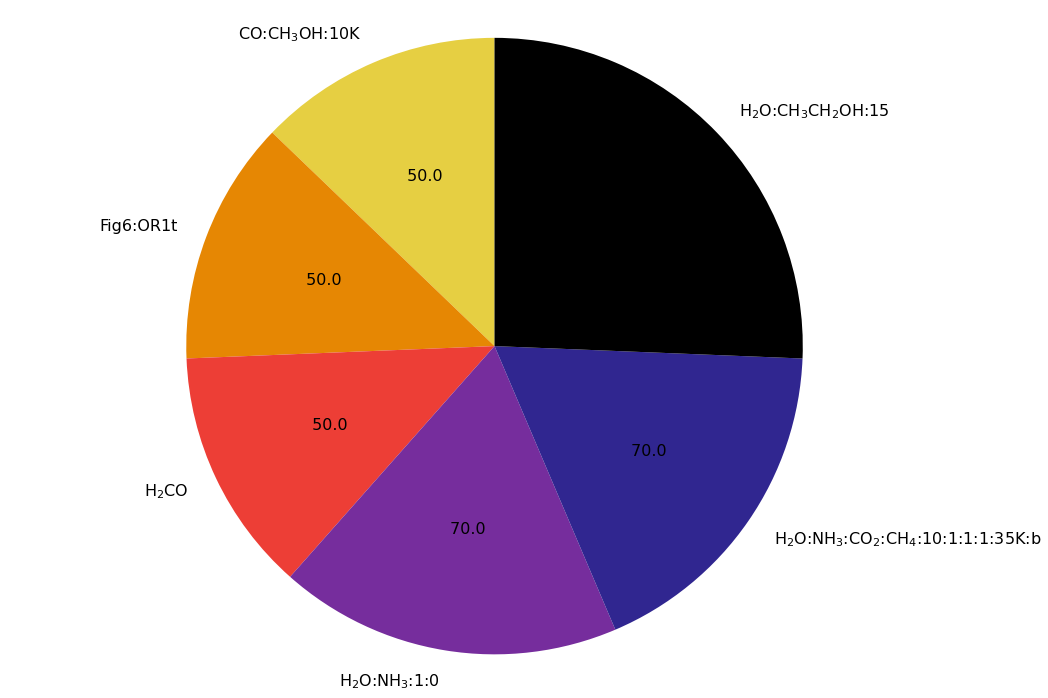

In [5]:
Pie_chart_plots.pie(sig_level=0.01)

#### Confidence intervals and column density determination

Here, ENIIGMA calculates the confidence intervals of the coefficients in the **best** solution. A few plots are created as output, which are described below in the sequence they appear:

1) Corner (triangle) plot: shows the correlations among all coefficients based on a $\chi^2$ analysis. In this case the confidence intervals are a function of the number of free parameters, not the goodness of the fit itself (see details in Avni & Bahcall 1980).

2) A plot with the best fit, and how it changes when the upper and lower confidence limits of the coefficients are adopted.

3) The best fit and the components overploted on the observational data. The residual fit is also shown.

4) A bar plot showing the column densities. **Note:** This only applies to the data included in the standard ENIIGMA library. If you uses your own library, ENIIGMA will not recognize, and consequently, no column density will be determined.

		RUNNING STATISTICAL MODULE
---------------------------------------------------
Making upper and lower confidence intervals...
---------------------------------------------------
---------------------------
Making deconvolution plot...
---------------------------
-----------------------------
Performing deconvolutions...
I am here!!
-----------------------------
Decomposing CO_CH3OH_10K
Decomposing H2O_CH3CH2OH_15.0K
Failed to decompose mixture!
Decomposing CO_CH3OH_10K
Decomposing H2O_CH3CH2OH_15.0K
Decomposing Fig6_OR1t
Decomposing CO_CH3OH_10K
Decomposing H2O_CH3CH2OH_15.0K
Failed to decompose mixture!
		Created by the ENIIGMA Team
		ENIIGMA code V.0 - April 2020


<Figure size 432x288 with 0 Axes>

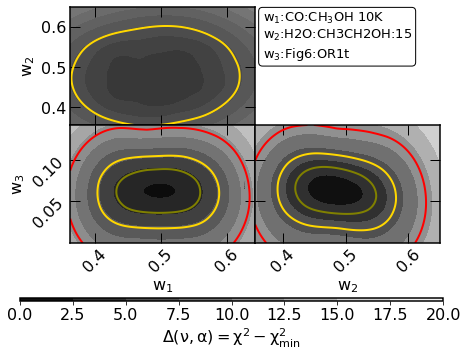

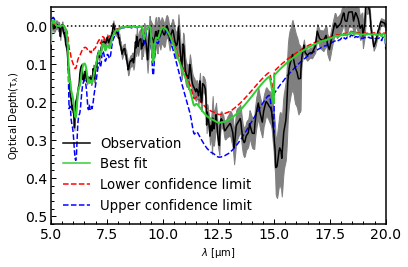

<Figure size 432x288 with 0 Axes>

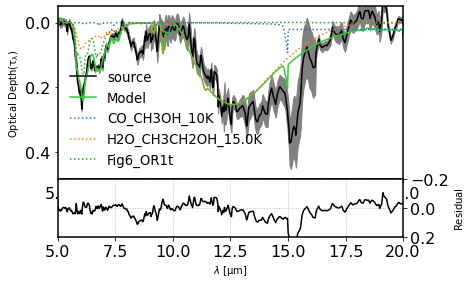

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
Stats_Module.stat(f_sig=2)

#### Mean column density determination

Ice fitting is not straightforward, and there are degeneracies intrinsic to the process. ENIIGMA provides a way to determine the mean ice column densities when all solutions (including the best solution) are taken into account. This can be done using the function **Degen_plots.merge_components**. 

As output, bar plots are shown containing the mean column densities, and the lower and upper limits.

An example is given below:

In [5]:
Degen_plots.merge_components_cd()

-------------------------------------------------------------------------
Searching for combinations inside 3 sigma confidence interval...
-------------------------------------------------------------------------
-------------------------------------------------------------------------
73  combinations found inside 3 sigma confidence interval

Deconvolving components and merging column densities...

Creating file: All_merge_final.csv
-------------------------------------------------------------------------
Failed to decompose mixture!
Decomposing CO_CH3OH_10K
Failed to decompose mixture!
Decomposing d_NH3_CH3OH_50_10K_I10m_Baselined
Failed to decompose mixture!
Failed to decompose mixture!
Failed to decompose mixture!
Skipping file
Decomposing CO_CH3OH_10K
Failed to decompose mixture!
Decomposing d_NH3_CH3OH_50_10K_I10m_Baselined
Failed to decompose mixture!
Failed to decompose mixture!
Failed to decompose mixture!
Decomposing CO_CH3OH_10K
Failed to decompose mixture!
Failed to decompo

/Users/willrocha/Test_ENIIGMA_Hawaii_jpy/ENIIGMA-fitting-tool/ENIIGMA/Stats/Degen_plots.py:217: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df = pd.concat(list(map(pd.read_csv, glob.glob(os.path.join('', "output_*.csv")))),


---------------------------------------
Making Fig_comb_hist.pdf...
---------------------------------------


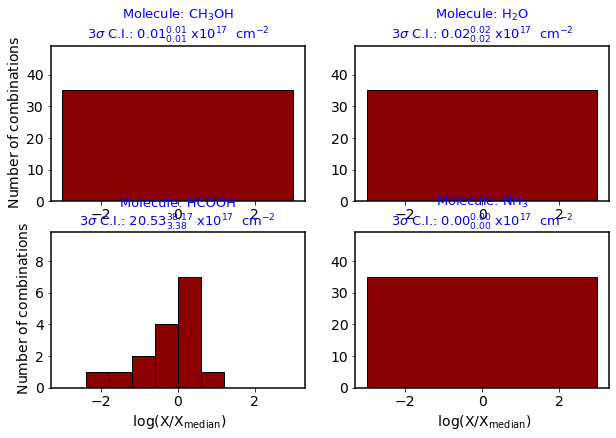

In [6]:
Degen_plots.hist_plot()